In [ ]:
# prompt: import files from drive as pandas pd

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Read the data from the CSV file in Google Drive
us_df = pd.read_csv('/content/drive/My Drive/MTH/us.csv')
student_df=pd.read_excel('/content/drive/My Drive/MTH/Enrollment.xlsx',skiprows=3, skipfooter=10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
student_df.Year

0     1948/49
1     1949/50
2     1950/51
3     1951/52
4     1952/53
       ...   
70    2018/19
71    2019/20
72    2020/21
73    2021/22
74    2022/23
Name: Year, Length: 75, dtype: object

In [ ]:
# prompt: from student_df, only include the last 3 rows

std_df=student_df.tail(5).reset_index()
std_df

,index,Year,Int'l Students,Training (OPT),Students,% Change,Enrollment*,Int'l
0,70,2018/19,872214,223085,1095299,0.05,19828000,5.5
1,71,2019/20,851957,223539,1075496,-1.807999,19720000,5.5
2,72,2020/21,710210,203885,914095,-15,19744000,4.6
3,73,2021/22,763760,184759,948519,3.8,20327000,4.7
4,74,2022/23,858395,198793,1057188,11.5,18961280,5.6


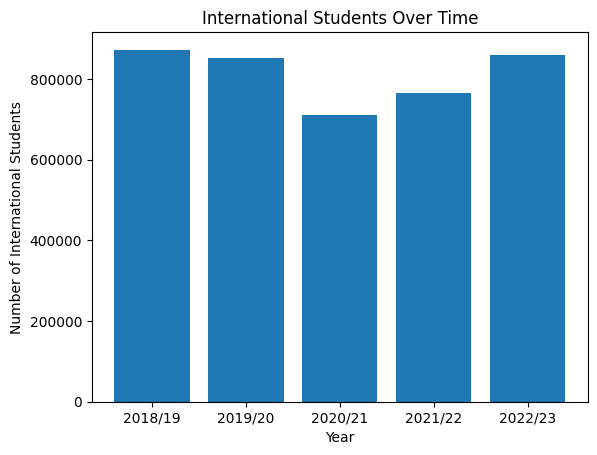

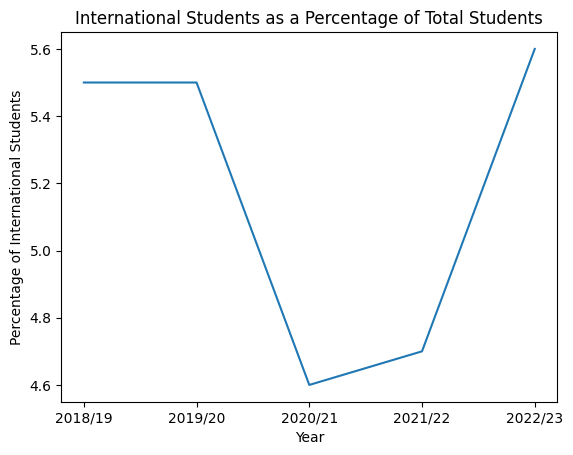

In [ ]:
# prompt: use the std_df and suggest me some graphs the feature is "Int'l Students" not Total

import matplotlib.pyplot as plt

# Bar chart of international students per year
plt.bar(std_df['Year'], std_df['Int\'l Students'])
plt.xlabel('Year')
plt.ylabel('Number of International Students')
plt.title('International Students Over Time')
plt.show()

# Line chart of international students as a percentage of total students
# std_df['Total Students'] = std_df['Total'].sub(std_df['Int\'l Students'])
std_df['International Percentage'] = std_df['Int\'l']
plt.plot(std_df['Year'], std_df['International Percentage'])
plt.xlabel('Year')
plt.ylabel('Percentage of International Students')
plt.title('International Students as a Percentage of Total Students')
plt.show()


In [ ]:
us_df['date'] = pd.to_datetime(us_df['date'])
us_df['Year']=us_df['date'].dt.year


In [ ]:
us_df_grouped = us_df.groupby('Year').agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()
us_df_grouped

,Year,cases,deaths
0,2020,1727289223,46413867
1,2021,13229129856,223987036
2,2022,31760084178,367427258
3,2023,8401350915,91790838


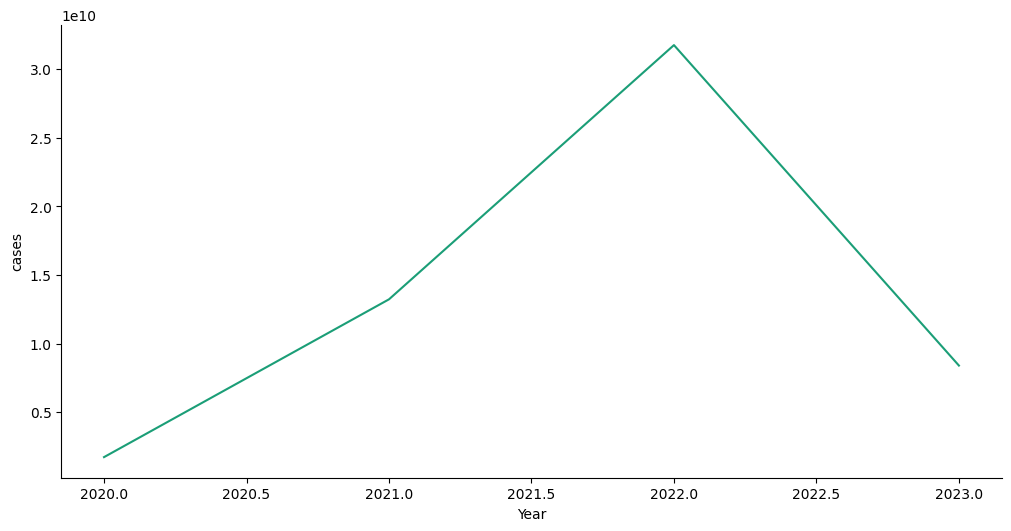

In [ ]:
# @title Year vs cases

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['cases']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = us_df_grouped.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('cases')

In [ ]:
std_df

,index,Year,Int'l Students,Training (OPT),Students,% Change,Enrollment*,Int'l,International Percentage
0,70,2019,872214,223085,1095299,0.05,19828000,5.5,5.5
1,71,2020,851957,223539,1075496,-1.807999,19720000,5.5,5.5
2,72,2021,710210,203885,914095,-15,19744000,4.6,4.6
3,73,2022,763760,184759,948519,3.8,20327000,4.7,4.7
4,74,2023,858395,198793,1057188,11.5,18961280,5.6,5.6


In [ ]:
# Convert "Year" column in std_df to datetime format
std_df['Year'] = pd.to_datetime(std_df['Year'], format='%Y/%y')

# Extract the second year from the "Year" column in std_df
std_df['Year'] = std_df['Year'].dt.year

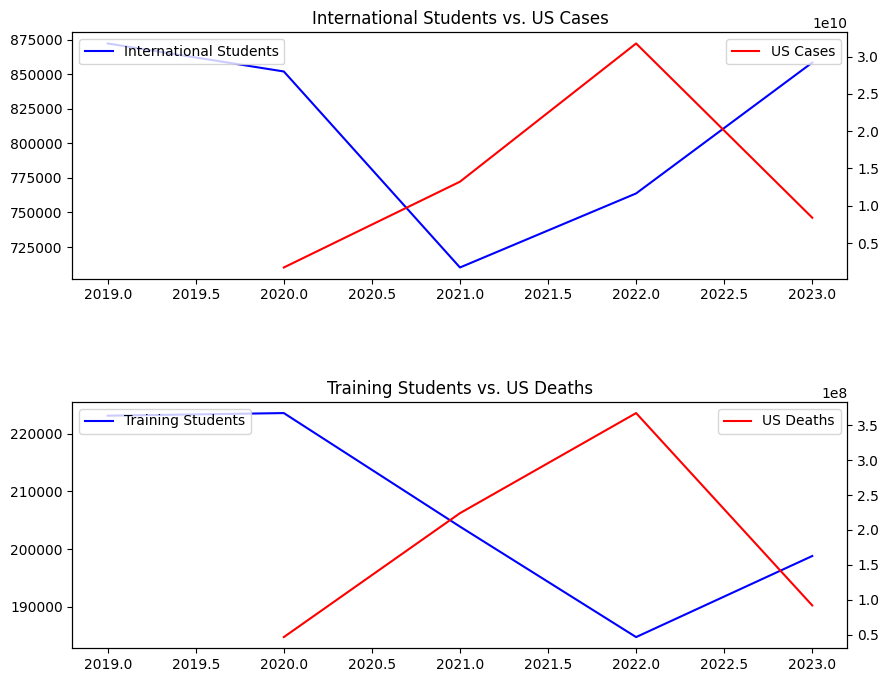

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot international students and US cases on the same subplot with separate y-axes
ax1 = axs[0].twinx()  # Create a second y-axis
axs[0].plot(std_df['Year'], std_df['Int\'l Students'], label='International Students', color='b')
ax1.plot(us_df_grouped['Year'], us_df_grouped['cases'], label='US Cases', color='r')
axs[0].set_title('International Students vs. US Cases')
axs[0].legend(loc='upper left')
ax1.legend(loc='upper right')

# Plot training students and US deaths on the same subplot with separate y-axes
ax2 = axs[1].twinx()  # Create a second y-axis
axs[1].plot(std_df['Year'], std_df['Training (OPT)'], label='Training Students', color='b')
ax2.plot(us_df_grouped['Year'], us_df_grouped['deaths'], label='US Deaths', color='r')
axs[1].set_title('Training Students vs. US Deaths')
axs[1].legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

TypeError: can only concatenate str (not "float") to str

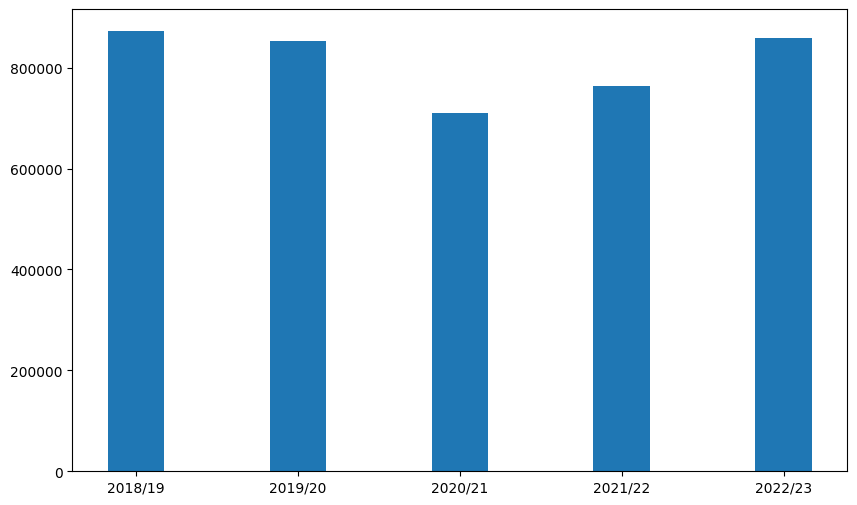